In [1]:
import pandas as pd
from sklearn import linear_model, metrics, model_selection
import numpy as np
import patsy
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("SCORES.csv")
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.shape

(25, 2)

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

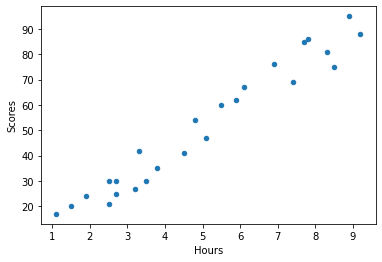

In [5]:
ax1 = df.plot.scatter("Hours", "Scores")
ax1

In [6]:
df_work = df.copy()
df_work.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
hours_x = df_work.loc[:,"Hours"]
scores_y = df_work.loc[:,"Scores"]
hours_x.head()

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

In [8]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(hours_x, scores_y, test_size=0.3)

In [9]:
from sklearn import linear_model

x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

reg = linear_model.LinearRegression()

reg.fit(x_train, y_train)

print('Coefficient: \n', reg.coef_)
#coefficient opisuje jak dobre jest dopasowanie modelu regresji

print('Intercept: \n', reg.intercept_)
#intercept opisuje wartosc regresji przy x = 0

Coefficient: 
 [9.74763194]
Intercept: 
 2.9914749661705073


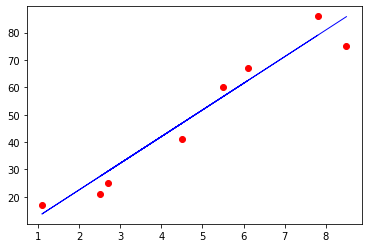

In [10]:
y_pred = reg.predict(x_test)
f, ax = plt.subplots()
ax.scatter(x_test, y_test,  color='red')
ax.plot(x_test, y_pred, color='blue', linewidth=1)
plt.show()

In [11]:
print("Mean squared error: %.2f" % np.mean((y_pred-y_test) ** 2))

Mean squared error: 37.83


In [12]:
print("Root mean squared error: %.2f" % np.sqrt(np.mean((y_pred-y_test) ** 2)))

Root mean squared error: 6.15


In [13]:
from sklearn.metrics import mean_absolute_error
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,y_pred))

Mean absolute error: 5.70


In [14]:
## script used on SBP.csv

df = pd.read_csv("SBP.csv")
df.describe()

,Age,SBP
count,19.000000,19.000000
mean,64.947368,129.421053
std,7.214751,13.454928
min,54.000000,111.000000
25%,60.500000,119.000000
50%,63.000000,129.000000
75%,68.500000,137.000000
max,79.000000,163.000000


<AxesSubplot:xlabel='Age', ylabel='SBP'>

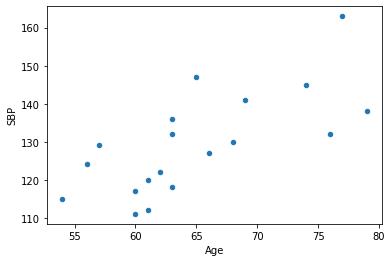

In [15]:
ax1 = df.plot.scatter("Age", "SBP")
ax1

In [16]:
df_work = df.copy()
age_x = df_work.loc[:,"Age"]
sbp_y = df_work.loc[:,"SBP"]
x_train, x_test, y_train, y_test = model_selection.train_test_split(age_x, sbp_y, test_size=0.3)
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

reg = linear_model.LinearRegression()

reg.fit(x_train, y_train)

print('Coefficient: \n', reg.coef_)
#coefficient opisuje jak dobre jest dopasowanie modelu regresji

print('Intercept: \n', reg.intercept_)
#intercept opisuje wartosc regresji przy x = 0

Coefficient: 
 [1.36073966]
Intercept: 
 38.93021312160468


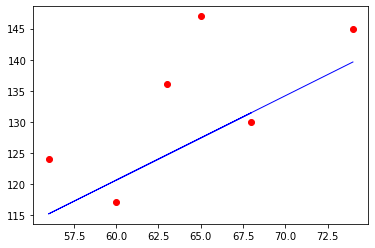

In [17]:
y_pred = reg.predict(x_test)
f, ax = plt.subplots()
ax.scatter(x_test, y_test,  color='red')
ax.plot(x_test, y_pred, color='blue', linewidth=1)
plt.show()

In [18]:
print("Mean squared error: %.2f" % np.mean((y_pred-y_test) ** 2))
print("Root mean squared error: %.2f" % np.sqrt(np.mean((y_pred-y_test) ** 2)))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test,y_pred))
# Jak widac bledy sa wieksze, gdyz dane sa bardziej rozrzucone. Zmiana cisnienia moze nie miec charakteru liniowego
# wzgledem wieku przez cale zycie czlowieka. Test pokazuje jednak, ze da sie taka zaleznosc zauwazyc.

Mean squared error: 106.02
Root mean squared error: 10.30
Mean absolute error: 8.37


In [19]:
## petrol.csv

df = pd.read_csv("PETROL.csv")
df.describe()

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


<AxesSubplot:xlabel='Podatek_paliwowy', ylabel='Zuzycie_paliwa'>

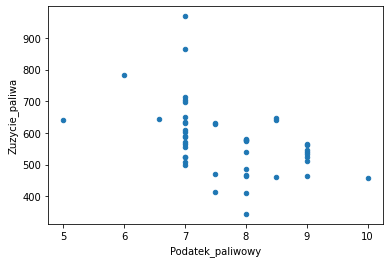

In [20]:
ax1 = df.plot.scatter("Podatek_paliwowy", "Zuzycie_paliwa")
ax1

<AxesSubplot:xlabel='Sredni_przychod', ylabel='Zuzycie_paliwa'>

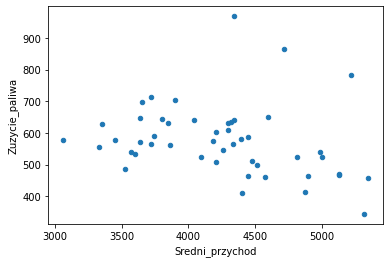

In [21]:
ax2 = df.plot.scatter("Sredni_przychod", "Zuzycie_paliwa")
ax2

<AxesSubplot:xlabel='Utwardzone_autostrady', ylabel='Zuzycie_paliwa'>

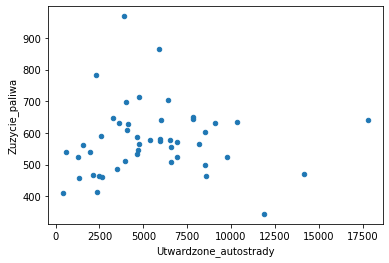

In [22]:
ax3 = df.plot.scatter("Utwardzone_autostrady", "Zuzycie_paliwa")
ax3

<AxesSubplot:xlabel='Procent_ludnosci_z_prawem_jazdy', ylabel='Zuzycie_paliwa'>

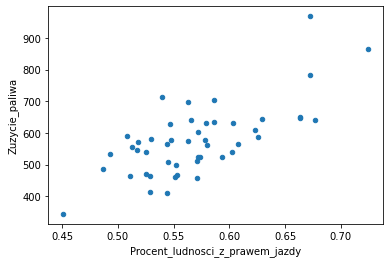

In [23]:
ax4 = df.plot.scatter("Procent_ludnosci_z_prawem_jazdy", "Zuzycie_paliwa")
ax4

In [24]:
df_work = df.copy()
x1 = df_work.loc[:,"Podatek_paliwowy"]
x2 = df_work.loc[:,"Sredni_przychod"]
x3 = df_work.loc[:,"Utwardzone_autostrady"]
x4 = df_work.loc[:,"Procent_ludnosci_z_prawem_jazdy"]
y = df_work.loc[:,"Zuzycie_paliwa"]
x1_train, x1_test, y1_train, y1_test = model_selection.train_test_split(x1, y, test_size=0.3)
x1_train = x1_train.values.reshape(-1, 1)
x1_test = x1_test.values.reshape(-1, 1)

reg1 = linear_model.LinearRegression()

reg1.fit(x1_train, y1_train)

print('Coefficient Podatek Paliwowy: \n', reg1.coef_)
#coefficient opisuje jak dobre jest dopasowanie modelu regresji

print('Intercept Podatek Paliwowy: \n', reg1.intercept_)
#intercept opisuje wartosc regresji przy x = 0

Coefficient Podatek Paliwowy: 
 [-49.71082788]
Intercept Podatek Paliwowy: 
 960.8856325510837


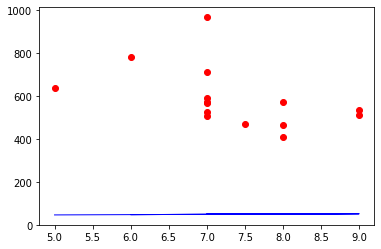

In [25]:
y1_pred = reg.predict(x1_test)
f, ax = plt.subplots()
ax.scatter(x1_test, y1_test,  color='red')
ax.plot(x1_test, y1_pred, color='blue', linewidth=1)
plt.show()

In [26]:
print("Mean squared error: %.2f" % np.mean((y1_pred-y1_test) ** 2))
print("Root mean squared error: %.2f" % np.sqrt(np.mean((y1_pred-y1_test) ** 2)))
print("Mean absolute error: %.2f" % mean_absolute_error(y1_test,y1_pred))

# Olbrzymie wartosci kontrolne, mowia, ze test nie wykrywa zadnej zaleznosci miedzy danymi.

Mean squared error: 310298.91
Root mean squared error: 557.04
Mean absolute error: 539.80


In [27]:
x2_train, x2_test, y2_train, y2_test = model_selection.train_test_split(x2, y, test_size=0.3)
x2_train = x2_train.values.reshape(-1, 1)
x2_test = x2_test.values.reshape(-1, 1)

reg2 = linear_model.LinearRegression()

reg2.fit(x2_train, y2_train)

print('Coefficient Zuzycie paliwa: \n', reg2.coef_)

print('Intercept Zuzycie paliwa: \n', reg2.intercept_)

Coefficient Zuzycie paliwa: 
 [-0.063236]
Intercept Zuzycie paliwa: 
 838.5979327142992


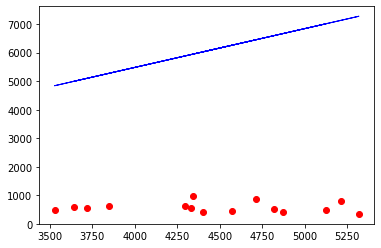

In [28]:
y2_pred = reg.predict(x2_test)
f, ax = plt.subplots()
ax.scatter(x2_test, y2_test,  color='red')
ax.plot(x2_test, y2_pred, color='blue', linewidth=1)
plt.show()

In [29]:
print("Mean squared error: %.2f" % np.mean((y2_pred-y2_test) ** 2))
print("Root mean squared error: %.2f" % np.sqrt(np.mean((y2_pred-y2_test) ** 2)))
print("Mean absolute error: %.2f" % mean_absolute_error(y2_test,y2_pred))

# Olbrzymie wartosci kontrolne, mowia, ze test nie wykrywa zadnej zaleznosci miedzy danymi.

Mean squared error: 31049430.23
Root mean squared error: 5572.20
Mean absolute error: 5515.94


In [30]:
x3_train, x3_test, y3_train, y3_test = model_selection.train_test_split(x3, y, test_size=0.3)
x3_train = x3_train.values.reshape(-1, 1)
x3_test = x3_test.values.reshape(-1, 1)

reg3 = linear_model.LinearRegression()

reg3.fit(x3_train, y3_train)

print('Coefficient Utwardzone drogi: \n', reg3.coef_)

print('Intercept Utwardzone drogi: \n', reg3.intercept_)

Coefficient Utwardzone drogi: 
 [-0.00267947]
Intercept Utwardzone drogi: 
 588.3932723369761


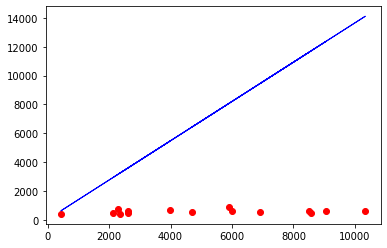

In [31]:
y3_pred = reg.predict(x3_test)
f, ax = plt.subplots()
ax.scatter(x3_test, y3_test,  color='red')
ax.plot(x3_test, y3_pred, color='blue', linewidth=1)
plt.show()

In [32]:
print("Mean squared error: %.2f" % np.mean((y3_pred-y3_test) ** 2))
print("Root mean squared error: %.2f" % np.sqrt(np.mean((y3_pred-y3_test) ** 2)))
print("Mean absolute error: %.2f" % mean_absolute_error(y3_test,y3_pred))

# Olbrzymie wartosci kontrolne, mowia, ze test nie wykrywa zadnej zaleznosci miedzy danymi.

Mean squared error: 56740855.79
Root mean squared error: 7532.65
Mean absolute error: 6387.90


In [33]:
x4_train, x4_test, y4_train, y4_test = model_selection.train_test_split(x4, y, test_size=0.3)
x4_train = x4_train.values.reshape(-1, 1)
x4_test = x4_test.values.reshape(-1, 1)

reg4 = linear_model.LinearRegression()

reg4.fit(x4_train, y4_train)

print('Coefficient Procent ludnosci z prawem jazdy: \n', reg4.coef_)

print('Intercept Procent ludnosci z prawem jazdy: \n', reg4.intercept_)

Coefficient Procent ludnosci z prawem jazdy: 
 [1369.15198519]
Intercept Procent ludnosci z prawem jazdy: 
 -200.7570533951574


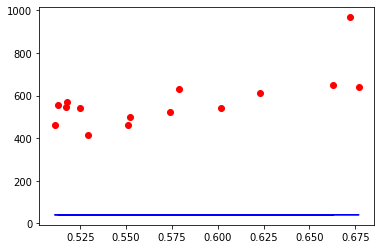

In [34]:
y4_pred = reg.predict(x4_test)
f, ax = plt.subplots()
ax.scatter(x4_test, y4_test,  color='red')
ax.plot(x4_test, y4_pred, color='blue', linewidth=1)
plt.show()

In [35]:
print("Mean squared error: %.2f" % np.mean((y4_pred-y4_test) ** 2))
print("Root mean squared error: %.2f" % np.sqrt(np.mean((y4_pred-y4_test) ** 2)))
print("Mean absolute error: %.2f" % mean_absolute_error(y4_test,y4_pred))

# Olbrzymie wartosci kontrolne, mowia, ze test nie wykrywa zadnej zaleznosci miedzy danymi.
# Wysoka wartość współczynnika intercept powoduje, że testy regresji liniowej nie dają oczekiwanych rezultatów.
# To oznacza, że jeśli dane nie zmierzają do 0 dla x=0, regresja liniowa dawać będzie niedokładne wyniki.

Mean squared error: 300980.20
Root mean squared error: 548.62
Mean absolute error: 534.36


In [36]:
## zad 3 HEART.csv

df = pd.read_csv("HEART.csv")
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1
293,65,1,4,130,275,0,1,115,1,1.0,2,?,?,1


In [37]:
df.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [38]:
df=df.replace({'?':None})

In [39]:
df2 = df.dropna(thresh=len(df.columns)-2)
df2.reset_index(inplace=True)
df2.tail()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
107,288,52,1,4,140,266,0,0,134,1,2.0,2,None,None,1
108,290,54,0,3,130,294,0,1,100,1,0.0,2,None,None,1
109,291,56,1,4,155,342,1,0,150,1,3.0,2,None,None,1
110,292,58,0,2,180,393,0,0,110,1,1.0,2,None,7,1
111,293,65,1,4,130,275,0,1,115,1,1.0,2,None,None,1


In [40]:
dummies_cp=pd.get_dummies(df2['cp'])
df2.restecg.value_counts()
# restecg nie potrzebuje operacji get_dummies po pozbyciu sie wierszy z niepelnymi danymi.

0    87
1    25
Name: restecg, dtype: int64

In [41]:
dummies_cp.columns=['cp1','cp2','cp3','cp4']
dummies_cp

,cp1,cp2,cp3,cp4
0,1,0,0,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
107,0,0,0,1
108,0,0,1,0
109,0,0,0,1
110,0,1,0,0


In [42]:
df2.drop('cp', axis=1)

,index,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,3,30,0,170,237,0,1,170,0,0.0,None,None,6,0
1,17,36,1,112,340,0,0,184,0,1.0,2,None,3,0
2,25,37,1,120,223,0,0,168,0,0.0,None,None,3,0
3,32,39,1,120,200,0,0,160,1,1.0,2,None,None,0
4,56,42,1,120,228,0,0,152,1,1.5,2,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,288,52,1,140,266,0,0,134,1,2.0,2,None,None,1
108,290,54,0,130,294,0,1,100,1,0.0,2,None,None,1
109,291,56,1,155,342,1,0,150,1,3.0,2,None,None,1
110,292,58,0,180,393,0,0,110,1,1.0,2,None,7,1


In [43]:
df2.join(dummies_cp)
df2

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,3,30,0,1,170,237,0,1,170,0,0.0,None,None,6,0
1,17,36,1,3,112,340,0,0,184,0,1.0,2,None,3,0
2,25,37,1,4,120,223,0,0,168,0,0.0,None,None,3,0
3,32,39,1,2,120,200,0,0,160,1,1.0,2,None,None,0
4,56,42,1,3,120,228,0,0,152,1,1.5,2,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,288,52,1,4,140,266,0,0,134,1,2.0,2,None,None,1
108,290,54,0,3,130,294,0,1,100,1,0.0,2,None,None,1
109,291,56,1,4,155,342,1,0,150,1,3.0,2,None,None,1
110,292,58,0,2,180,393,0,0,110,1,1.0,2,None,7,1


In [44]:


y = df2['exang']
x = df2['age']
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2)
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

reg = linear_model.LogisticRegression()

reg.fit(x_train, y_train)

print('Coefficient: \n', reg.coef_)

print('Intercept: \n', reg.intercept_)

Coefficient: 
 [[0.03004161]]
Intercept: 
 [-0.83156054]


In [45]:
score = reg.score(x_test, y_test)
print(score)

0.6086956521739131


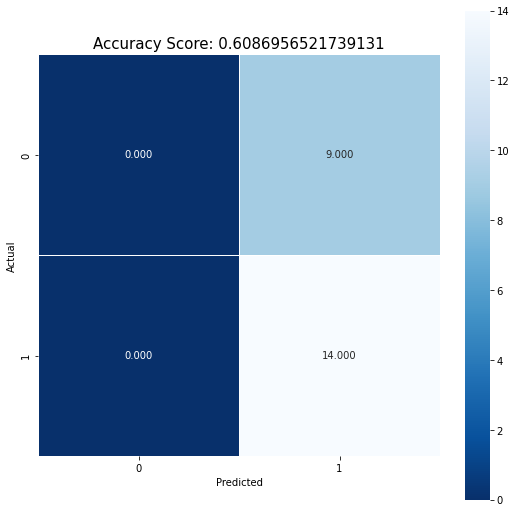

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
y_pred = reg.predict(x_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');
title = 'Accuracy Score: {0}'.format(score)
plt.title(title, size = 15);